**Домашняя работа**

Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)

Построить случайный лес, вывести важность признаков

Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

В качестве решения: Jupyter notebook с кодом, комментариями и графиками

In [136]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline ()
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, HuberRegressor, ElasticNet

UsageError: unrecognized arguments: ()


In [137]:
import warnings
warnings.filterwarnings("ignore")

In [138]:
data_train = pd.read_csv('train_h.csv')
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [139]:
# разбиваем данные на train и на test
data_train_y = data_train['SalePrice'].copy()
data_train_x = data_train.drop('SalePrice', axis=1)

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data_train_x, data_train_y, test_size=0.3)  

In [141]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1022, 80), (1022,), (438, 80), (438,))

In [142]:
# Соединим train и test, для удобства обработки
X_valid['is_test'] = 1
X_train['is_test'] = 0

In [143]:
data = pd.concat([X_valid, X_train])

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 541 to 453
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  Overall

In [145]:
data.isnull().sum()[data.isnull().sum().values != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [146]:
#Находим категориальные признаки
cat_feat = list(data.dtypes[data.dtypes == object].index)

In [147]:
# Разбиваем данные на категориальные и числовые
data_cat = data[cat_feat]

data_int = data.drop(cat_feat, axis=1)

In [148]:
# заполняем пропуски
data[data_cat.columns] = data_cat[data_cat.columns].fillna('NaN')
data[data_int.columns] = data[data_int.columns].fillna(0)

In [149]:
data.isnull().sum()[data.isnull().sum().values != 0]

Series([], dtype: int64)

In [150]:
# Обрабатываем категориальные переменные (при предположении что в test будут отличные значения,следовало бы обучаться только на train)
# Так же для каждого признака нужно было бы создать LabelEncoder, но в нашем примере можно этого не делать
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

for i  in data_cat.columns:
    if len(data[i].unique()) < 8:
        data = pd.get_dummies(data, columns=[i])
    else:
        le.fit(data[i])
        data[i] = le.transform(data[i])

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 541 to 453
Columns: 216 entries, Id to SaleCondition_Partial
dtypes: float64(3), int32(8), int64(35), uint8(170)
memory usage: 732.9 KB


In [152]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,...,MiscFeature_NaN,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
541,542,60,0.0,11000,15,2,2,5,8,5,...,1,0,0,0,0,0,0,0,1,0
828,829,60,0.0,28698,4,2,2,5,5,5,...,1,0,0,0,1,0,0,0,0,0
1153,1154,30,0.0,5890,9,2,2,2,6,8,...,1,0,0,0,0,0,0,0,1,0
805,806,20,91.0,12274,21,2,2,2,7,5,...,1,0,0,0,0,0,0,0,0,1
167,168,60,86.0,10562,16,2,2,5,8,5,...,1,0,0,0,0,0,0,0,0,1


In [153]:
# делим данные на трейн и тест
X_train = data[data.is_test==0]
X_valid = data[data.is_test==1]

X_train = X_train.drop('is_test', axis=1)
X_valid = X_valid.drop('is_test', axis=1)

In [154]:
#  делаем нормирование
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_sc = std.fit_transform(X_train)
X_train = pd.DataFrame(X_train_sc, columns=X_train.columns)

In [155]:
X_valid_sc = std.transform(X_valid)
X_valid = pd.DataFrame(X_valid_sc, columns=X_train.columns)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1022, 215), (1022,), (438, 215), (438,))

In [156]:
# Проверим как предсказывает модель на случайном лесе

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [157]:
clf_rf = RandomForestRegressor(n_jobs=-1, n_estimators=200)
max_depth = [5, 9, 13, 15]
min_samples_split = [10, 15, 25]
param_grid = {'max_depth': max_depth, 'min_samples_split': min_samples_split}

clf_rf = GridSearchCV(clf_rf, param_grid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
clf_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=200, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 9, 13, 15],
                         'min_samples_split': [10, 15, 25]},
             scoring='neg_mean_squared_error')

In [158]:
clf_rf_best = clf_rf.best_estimator_

In [159]:
y_pred_rf = clf_rf_best.predict(X_valid)

In [160]:
# Оценка по RandomForestRegressor
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_valid, y_pred_rf)
lin_rmse_rf = np.sqrt(lin_mse)
lin_rmse_rf

29800.582829749063

In [161]:
# Выводим важность признаков (TOP-5) 
imp = pd.Series(clf_rf_best.feature_importances_, index=X_train.columns)
imp.sort_values(ascending=False).head()

OverallQual    0.597038
GrLivArea      0.131115
TotalBsmtSF    0.046282
BsmtFinSF1     0.024448
2ndFlrSF       0.018152
dtype: float64

In [162]:
# Реализуем стекинг

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)

In [163]:
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float) 
    meta_test = np.zeros(X_test.shape[0], dtype=float) 
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)): 
        
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind])
        meta_test += clf.predict(X_test)
    
    return meta_train, meta_test / stack_cv.n_splits

In [164]:
# Первая модель для стекинга

from sklearn.linear_model import Lasso
lin_reg = Lasso()

In [165]:
param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1.]}
lasso_grid = GridSearchCV(lin_reg, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [166]:
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1.0]},
             scoring='neg_mean_squared_error')

In [167]:
lasso_grit_best = lasso_grid.best_estimator_

In [168]:
y_pred_lasso = lasso_grit_best.predict(X_valid)

In [169]:
lin_mse = mean_squared_error(y_valid, y_pred_lasso)
rmse_lasso = np.sqrt(lin_mse)
rmse_lasso

36567.63885745379

In [170]:
# Вторая модель для стекинга RandomForest, которую реализовали ранее

clf_rf_best = clf_rf.best_estimator_

In [171]:
y_pred_rf = clf_rf_best.predict(X_valid)

In [172]:
lin_mse = mean_squared_error(y_valid, y_pred_rf)
rmse_rf = np.sqrt(lin_mse)
rmse_rf

29800.582829749063

In [173]:
# Третья модель для стекинга
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge
ridge_reg = Ridge()

In [174]:
ridge_params = {
    'alpha': np.logspace(-3, 5, 200),
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
grid_ridge = GridSearchCV(ridge_reg, ridge_params, cv=10, verbose=2, n_jobs=-1)
grid_ridge.fit(X_train, y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 509 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1269 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1826 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2483 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3233 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 4105 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 5016 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 5933 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 9388 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 11985 out of 12000 | elapsed: 12.8min remaining:    0.9s
[Parallel(n_jobs=-1)]: D

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 1.09698580e-03, 1.20337784e-03, 1.32008840e-03,
       1.44811823e-03, 1.58856513e-03, 1.74263339e-03, 1.91164408e-03,
       2.09704640e-03, 2.30043012e-03, 2.52353917e-03, 2.76828663e-03,
       3.03677112e-03, 3.33129479e-03, 3.65438307e-03, 4.00880633e-03,
       4.39760361e-03, 4.82410870e-03, 5.2919...
       1.72258597e+04, 1.88965234e+04, 2.07292178e+04, 2.27396575e+04,
       2.49450814e+04, 2.73644000e+04, 3.00183581e+04, 3.29297126e+04,
       3.61234270e+04, 3.96268864e+04, 4.34701316e+04, 4.76861170e+04,
       5.23109931e+04, 5.73844165e+04, 6.29498899e+04, 6.90551352e+04,
       7.57525026e+04, 8.30994195e+04, 9.11588830e+04, 1.00000000e+05]),
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             verbose=2)

In [180]:
grid_ridge.best_estimator_

Ridge(alpha=511.14334834401654, solver='sag')

In [183]:
ridge_grit_best = grid_ridge.best_estimator_

In [184]:
y_pred_ridge = ridge_grit_best.predict(X_valid)

In [185]:
lin_mse = mean_squared_error(y_valid, y_pred_ridge)
rmse_ridge = np.sqrt(lin_mse)
rmse_ridge

37409.052228416396

In [188]:
# На этих трех моделях реализуем стекинг

all_models = [lasso_grit_best, clf_rf_best, ridge_grit_best]

In [189]:
meta_train = []
meta_test = []
for i in all_models:
    meta_tr, meta_te = get_meta_features(i, X_train, y_train, X_valid, cv)
    meta_train.append(meta_tr)
    meta_test.append(meta_te)

    
col_names = ['lasso_model', 'rf_model', 'ridge_model']

In [190]:
X_train_meta = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_test_meta = pd.DataFrame(np.stack(meta_test,axis=1), columns=col_names)

In [191]:
X_train_meta.head()

,lasso_model,rf_model,ridge_model
0,362634.011806,343720.726495,350997.419289
1,190998.524960,198662.821766,193083.933513
2,256561.193409,260555.036427,246297.070690
3,122075.782239,136576.213562,136401.390871
4,232623.430792,308067.269885,226310.690774


In [192]:
# Обучаем гипер модель (LinearRegression)


from sklearn.linear_model import LinearRegression
clf_lr_meta = LinearRegression(n_jobs=-1)

In [193]:
clf_lr_meta.fit(X_train_meta, y_train)

LinearRegression(n_jobs=-1)

In [194]:
yl_pred_meta_test = clf_lr_meta.predict(X_test_meta)

In [195]:
lin_mse = mean_squared_error(y_valid, yl_pred_meta_test)
rmse_stack = np.sqrt(lin_mse)
rmse_stack

30813.464895536363

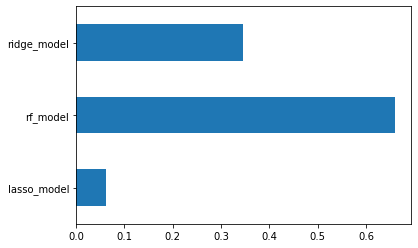

In [196]:
pd.Series(clf_lr_meta.coef_.flatten(), index=X_train_meta.columns).plot(kind='barh')

In [198]:
print ('Результат lasso_reg',rmse_lasso)
print ('Результат Lasso RandomForest',rmse_rf)
print ('Результат Ridge_reg',rmse_ridge)
print ('Результат stacking',rmse_stack)

Результат lasso_reg 36567.63885745379
Результат Lasso RandomForest 29800.582829749063
Результат Ridge_reg 37409.052228416396
Результат stacking 30813.464895536363
